In [1]:
from roms_tools import Grid

In [2]:
from roms_tools.setup.topography import _get_topography_data, _smooth_topography_globally

In [3]:
from roms_tools.setup.utils import get_target_coords

In [4]:
import xarray as xr

In [5]:
print(xr.__version__)

2024.10.0


In [23]:
import matplotlib.pyplot as plt

## Example cases

### Iceland

In [6]:
iceland_kwargs = {
    "size_x": 800,
    "size_y": 800,
    "center_lon": -19,
    "center_lat": 65,
    "rot": 20,
    "verbose": True,
}

In [7]:
fine_grid_iceland = Grid(
    nx=5000, ny=5000, **iceland_kwargs,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    }                           
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 37.738 seconds
INFO - ========================================================================================================
INFO - === Generating the topography and mask using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 1.072 seconds
INFO - Regridding the topography: 2.563 seconds
INFO - Preparing the masks: 7.873 seconds
INFO - Smoothing the topography globally: 6.602 seconds
INFO - Smoothing the topography locally: 101.646 seconds
INFO - Total time: 119.865 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


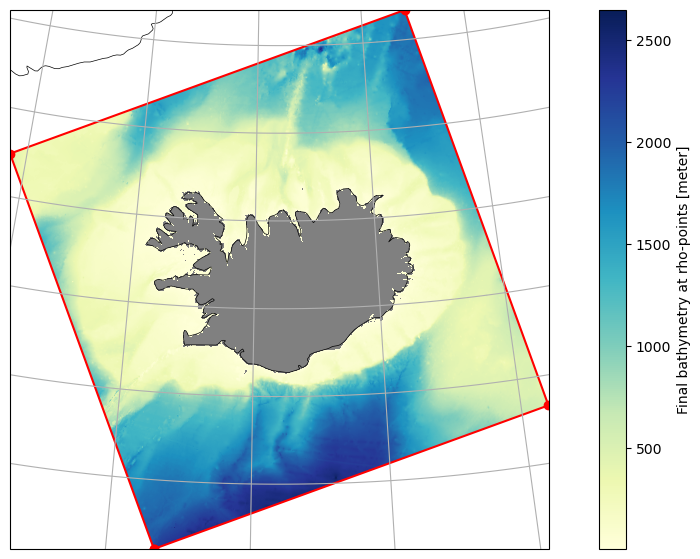

In [34]:
fine_grid_iceland.plot(bathymetry=True)

### Wales

In [ ]:
wales_kwargs = {
    "size_x": 240,
    "size_y": 240,
    "center_lat": 52.36,
    "center_lon": -4.1,
    "rot": 0,
}

In [16]:
%%time

fine_grid_wales_ETOPO5 = Grid(
    nx=24*50, ny=24*50, **wales_kwargs, verbose=True
)

=== Computing latitude and longitude coordinates ===
Total time: 1.859 seconds
=== Making the topography and mask using ETOPO5 data ===
Reading the topography data: 0.182 seconds
Regridding the topography: 0.057 seconds
Preparing the masks: 0.024 seconds
Smoothing the topography globally: 0.193 seconds
Smoothing the topography locally: 0.343 seconds
Total time: 0.810 seconds
=== Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
Total time: 0.003 seconds
CPU times: user 2.47 s, sys: 72.4 ms, total: 2.55 s
Wall time: 2.72 s


In [17]:
%%time

fine_grid_wales_SRTM15 = Grid(
    nx=24*50, ny=24*50, **wales_kwargs, verbose=True,
        topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
)

=== Computing latitude and longitude coordinates ===
Total time: 1.813 seconds
=== Making the topography and mask using SRTM15 data ===
Reading the topography data: 0.037 seconds
Regridding the topography: 0.264 seconds
Preparing the masks: 0.028 seconds
Smoothing the topography globally: 0.186 seconds
Smoothing the topography locally: 1.930 seconds
Total time: 2.457 seconds
=== Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
Total time: 0.002 seconds
CPU times: user 4.07 s, sys: 46.3 ms, total: 4.12 s
Wall time: 4.32 s


In [18]:
%%time

coarse_grid_wales_ETOPO5 = Grid(
    nx=24, ny=24, **wales_kwargs, verbose=True
)

=== Computing latitude and longitude coordinates ===
Total time: 0.022 seconds
=== Making the topography and mask using ETOPO5 data ===
Reading the topography data: 0.183 seconds
Regridding the topography: 0.018 seconds
Preparing the masks: 0.002 seconds
Smoothing the topography globally: 0.005 seconds
Smoothing the topography locally: 0.282 seconds
Total time: 0.496 seconds
=== Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
Total time: 0.002 seconds
CPU times: user 337 ms, sys: 7.93 ms, total: 345 ms
Wall time: 535 ms


In [19]:
%%time

coarse_grid_wales_SRTM15 = Grid(
    nx=24, ny=24, **wales_kwargs, verbose=True,
        topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
)

=== Computing latitude and longitude coordinates ===
Total time: 0.010 seconds
=== Making the topography and mask using SRTM15 data ===
Reading the topography data: 0.037 seconds
Regridding the topography: 0.039 seconds
Preparing the masks: 0.003 seconds
Smoothing the topography globally: 0.005 seconds
Smoothing the topography locally: 0.276 seconds
Total time: 0.364 seconds
=== Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
Total time: 0.002 seconds
CPU times: user 331 ms, sys: 3.04 ms, total: 334 ms
Wall time: 391 ms


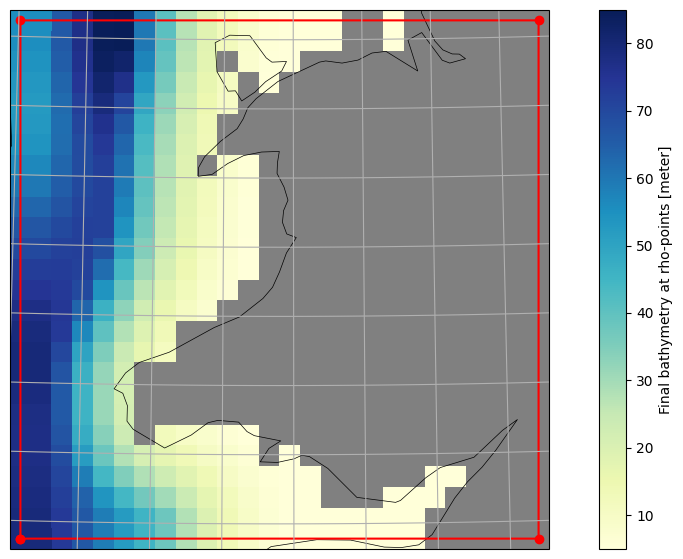

In [24]:
coarse_grid_wales_ETOPO5.plot(bathymetry=True)

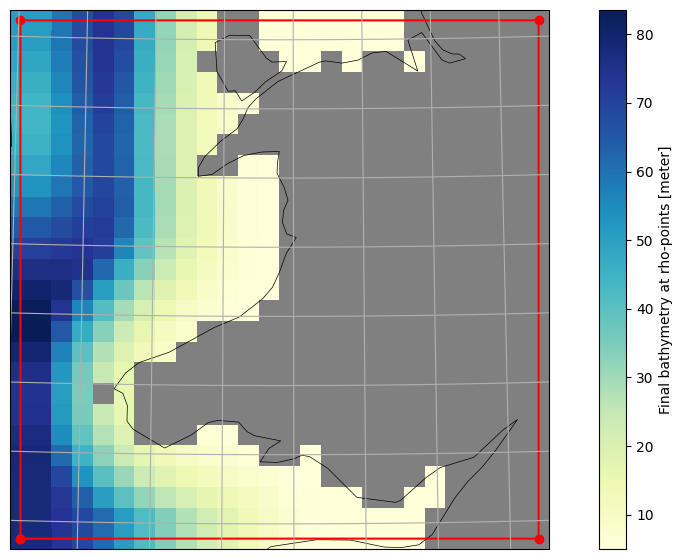

In [25]:
coarse_grid_wales_SRTM15.plot(bathymetry=True)

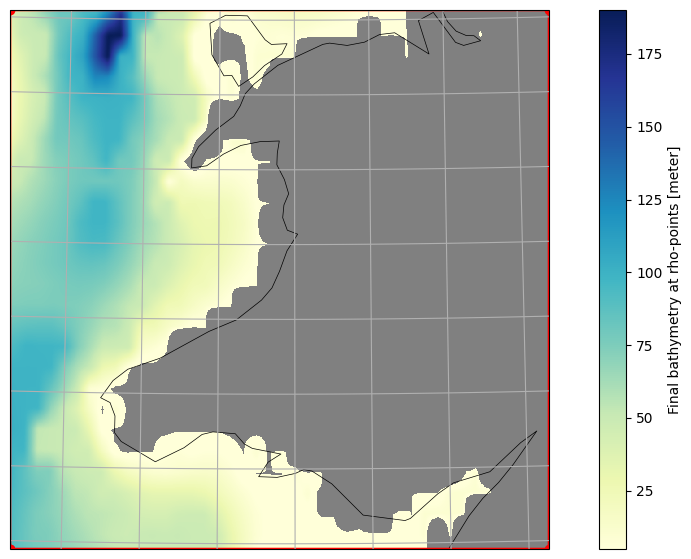

In [26]:
fine_grid_wales_ETOPO5.plot(bathymetry=True)

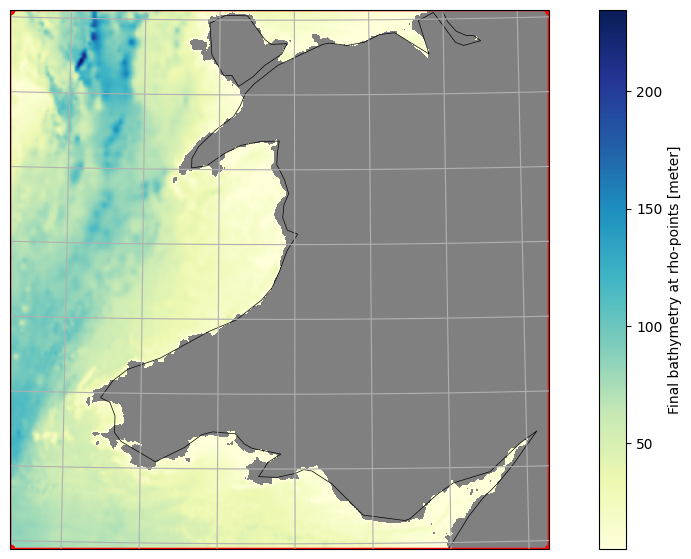

In [27]:
fine_grid_wales_SRTM15.plot(bathymetry=True)

## Interpolation method

In [10]:
import xesmf

In [11]:
target_coords = get_target_coords(fine_grid_iceland)

{'lat': <xarray.DataArray 'lat_rho' (eta_rho: 5002, xi_rho: 5002)> Size: 200MB
 array([[60.31545726, 60.31604045, 60.3166236 , ..., 62.48204074,
         62.48231245, 62.48258409],
        [60.31677035, 60.31735357, 60.31793674, ..., 62.48345173,
         62.48372345, 62.48399511],
        [60.31808344, 60.31866669, 60.31924988, ..., 62.48486272,
         62.48513446, 62.48540612],
        ...,
        [66.7208381 , 66.72156889, 66.72229962, ..., 69.50310111,
         69.50345963, 69.50381806],
        [66.72207504, 66.72280587, 66.72353663, ..., 69.50449254,
         69.50485109, 69.50520954],
        [66.72331196, 66.72404282, 66.72477362, ..., 69.50588397,
         69.50624254, 69.50660101]])
 Coordinates:
     lat_rho  (eta_rho, xi_rho) float64 200MB 60.32 60.32 60.32 ... 69.51 69.51
     lon_rho  (eta_rho, xi_rho) float64 200MB 336.7 336.7 336.7 ... 347.1 347.1
 Dimensions without coordinates: eta_rho, xi_rho
 Attributes:
     long_name:  latitude of rho-points
     units:      de

In [18]:
ds_out = xr.Dataset()
ds_out["lat"] = target_coords["lat"]
ds_out["lon"] = target_coords["lon"]
ds_out["lat_b"] = target_coords["lat_psi"]
ds_out["lon_b"] = target_coords["lon_psi"]

In [13]:
srtm15_data = _get_topography_data(        
    {
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    }
)   
srtm15_data.choose_subdomain(target_coords, buffer_points=3)

In [14]:
srtm15_data.ds

<xarray.Dataset> Size: 46MB
Dimensions:  (lon: 5223, lat: 2212)
Coordinates:
  * lon      (lon) float64 42kB 329.3 329.3 329.3 329.3 ... 351.0 351.0 351.0
  * lat      (lat) float64 18kB 60.31 60.31 60.31 60.32 ... 69.51 69.51 69.52
Data variables:
    z        (lat, lon) float32 46MB ...
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdmath
    history:      gmt grdmath SRTM15+V2.1_land_masked.nc debug/polished.unmas...
    description:  
    GMT_version:  6.4.0 [64-bit]
    node_offset:  1

In [15]:
regridders = {}

In [17]:
ds_out

<xarray.Dataset> Size: 801MB
Dimensions:  (eta_rho: 5002, xi_rho: 5002)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 200MB 60.32 60.32 60.32 ... 69.51 69.51
    lon_rho  (eta_rho, xi_rho) float64 200MB 336.7 336.7 336.7 ... 347.1 347.1
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    lat      (eta_rho, xi_rho) float64 200MB 60.32 60.32 60.32 ... 69.51 69.51
    lon      (eta_rho, xi_rho) float64 200MB 336.7 336.7 336.7 ... 347.1 347.1

In [19]:
method = "conservative"
%time regridders[method] = xesmf.Regridder(srtm15_data.ds, ds_out, method=method)

CPU times: user 11min 45s, sys: 22.9 s, total: 12min 8s
Wall time: 12min 14s


Memory footprint: > 50 GB

In [20]:
%time hraw_conservative = - regridders["conservative"](srtm15_data.ds["z"])

CPU times: user 5.79 s, sys: 73.7 ms, total: 5.86 s
Wall time: 7.61 s


Text(0.5, 1.0, 'Difference')

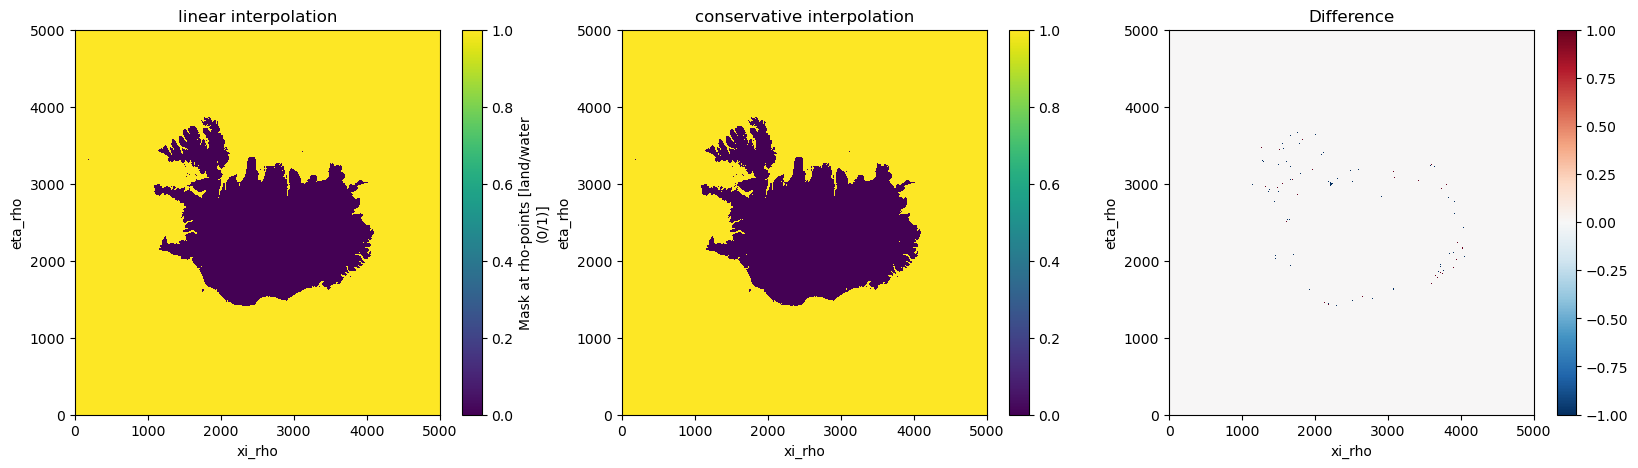

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
axs[0].set_title("linear interpolation")
xr.where(hraw_conservative > 0.0, 1.0, 0.0).plot(ax=axs[1])
axs[1].set_title("conservative interpolation")
(fine_grid_iceland.ds["mask_rho"] - xr.where(hraw_conservative > 0.0, 1.0, 0.0)).plot(ax=axs[2])
axs[2].set_title("Difference")

In [30]:
method = "bilinear"
%time regridders[method] = xesmf.Regridder(srtm15_data.ds, ds_out, method=method)

CPU times: user 7min 8s, sys: 32 s, total: 7min 40s
Wall time: 7min 41s


In [31]:
%time hraw_bilinear = - regridders["bilinear"](srtm15_data.ds["z"])

CPU times: user 7.26 s, sys: 3.83 ms, total: 7.27 s
Wall time: 7.26 s


Text(0.5, 1.0, 'Difference')

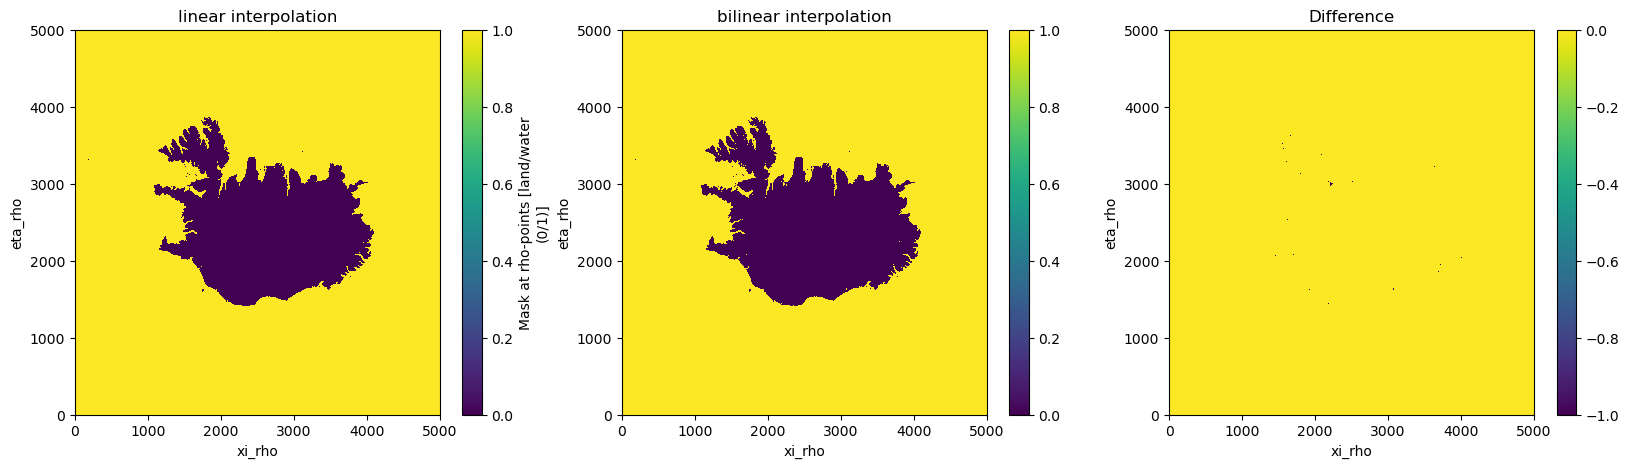

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
axs[0].set_title("linear interpolation")
xr.where(hraw_conservative > 0.0, 1.0, 0.0).plot(ax=axs[1])
axs[1].set_title("bilinear interpolation")
(fine_grid_iceland.ds["mask_rho"] - xr.where(hraw_bilinear > 0.0, 1.0, 0.0)).plot(ax=axs[2])
axs[2].set_title("Difference")

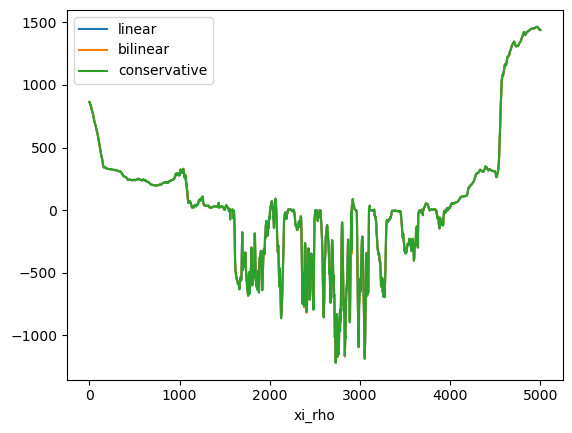

In [32]:
fine_grid_iceland.ds["hraw"].isel(eta_rho=3000).plot(label="linear")
hraw_bilinear.isel(eta_rho=3000).plot(label="bilinear")
hraw_conservative.isel(eta_rho=3000).plot(label="conservative")

plt.legend()

## Global smoothing

In [68]:
import gcm_filters

In [75]:
import numpy as np

In [81]:
def _smooth_topography_globally(hraw, factor, transition_width=np.pi) -> xr.DataArray:
    # since GCM-Filters assumes periodic domain, we extend the domain by one grid cell in each dimension
    # and set that margin to land

    mask = xr.ones_like(hraw)
    margin_mask = xr.concat([mask, 0 * mask.isel(eta_rho=-1)], dim="eta_rho")
    margin_mask = xr.concat(
        [margin_mask, 0 * margin_mask.isel(xi_rho=-1)], dim="xi_rho"
    )

    # we choose a Gaussian filter kernel corresponding to a Gaussian with standard deviation factor/sqrt(12);
    # this standard deviation matches the standard deviation of a boxcar kernel with total width equal to factor.
    filter = gcm_filters.Filter(
        filter_scale=factor,
        dx_min=1,
        filter_shape=gcm_filters.FilterShape.TAPER,
        transition_width=transition_width,
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
        grid_vars={"wet_mask": margin_mask},
    )
    hraw_extended = xr.concat([hraw, hraw.isel(eta_rho=-1)], dim="eta_rho")
    hraw_extended = xr.concat(
        [hraw_extended, hraw_extended.isel(xi_rho=-1)], dim="xi_rho"
    )

    hsmooth = filter.apply(hraw_extended, dims=["eta_rho", "xi_rho"])
    hsmooth = hsmooth.isel(eta_rho=slice(None, -1), xi_rho=slice(None, -1))

    return hsmooth

In [83]:
def use_taper(factor, transition_width=np.pi):
    hsmooth = _smooth_topography_globally(fine_grid_iceland.ds.hraw, factor=factor, transition_width=transition_width)
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
    axs[0].set_title("no smoothing")
    xr.where(hsmooth > 0.0, 1.0, 0.0).plot(ax=axs[1])
    axs[1].set_title(f"smoothing with Taper, factor = {factor}, tw = {transition_width}")
    (fine_grid_iceland.ds["mask_rho"] - xr.where(hsmooth > 0.0, 1.0, 0.0)).plot(ax=axs[2])
    axs[2].set_title("Difference")

In [93]:
def use_gaussian(factor):
    hsmooth = _smooth_topography_globally(fine_grid_iceland.ds.hraw, factor=factor)
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fine_grid_iceland.ds["mask_rho"].plot(ax=axs[0])
    axs[0].set_title("no smoothing")
    xr.where(hsmooth > 0.0, 1.0, 0.0).plot(ax=axs[1])
    axs[1].set_title(f"smoothing with Gaussian, factor = {factor}")
    (fine_grid_iceland.ds["mask_rho"] - xr.where(hsmooth > 0.0, 1.0, 0.0)).plot(ax=axs[2])
    axs[2].set_title("Difference")

CPU times: user 6.51 s, sys: 1.24 s, total: 7.74 s
Wall time: 7.9 s


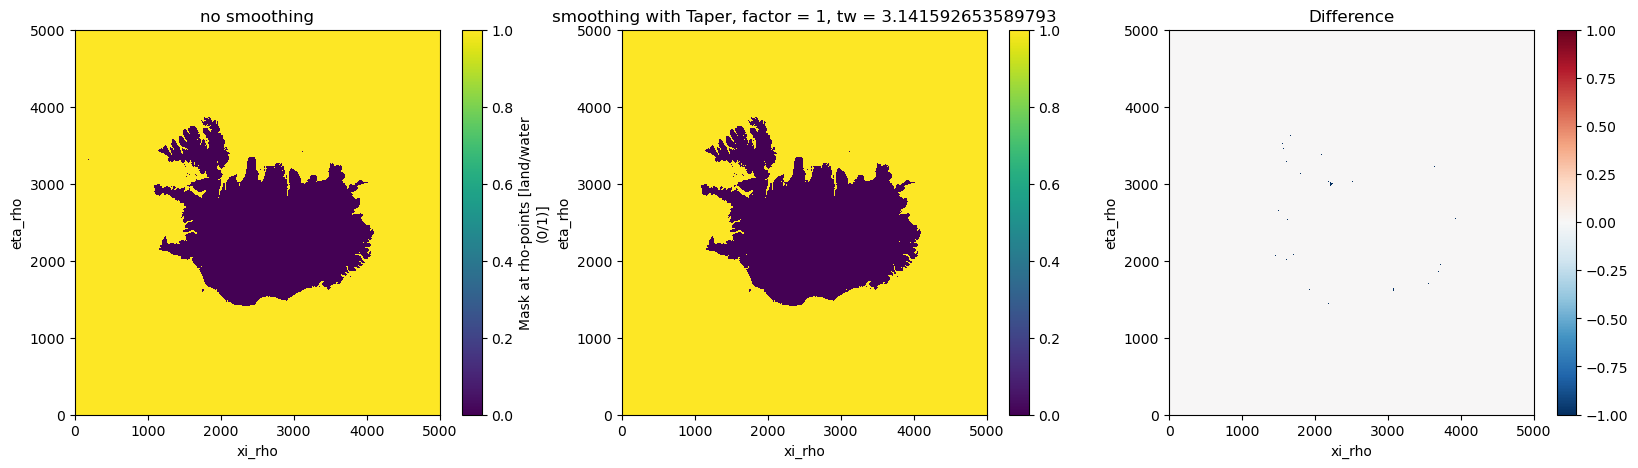

In [87]:
%time use_taper(factor=1)

CPU times: user 7.72 s, sys: 3.98 ms, total: 7.73 s
Wall time: 7.76 s


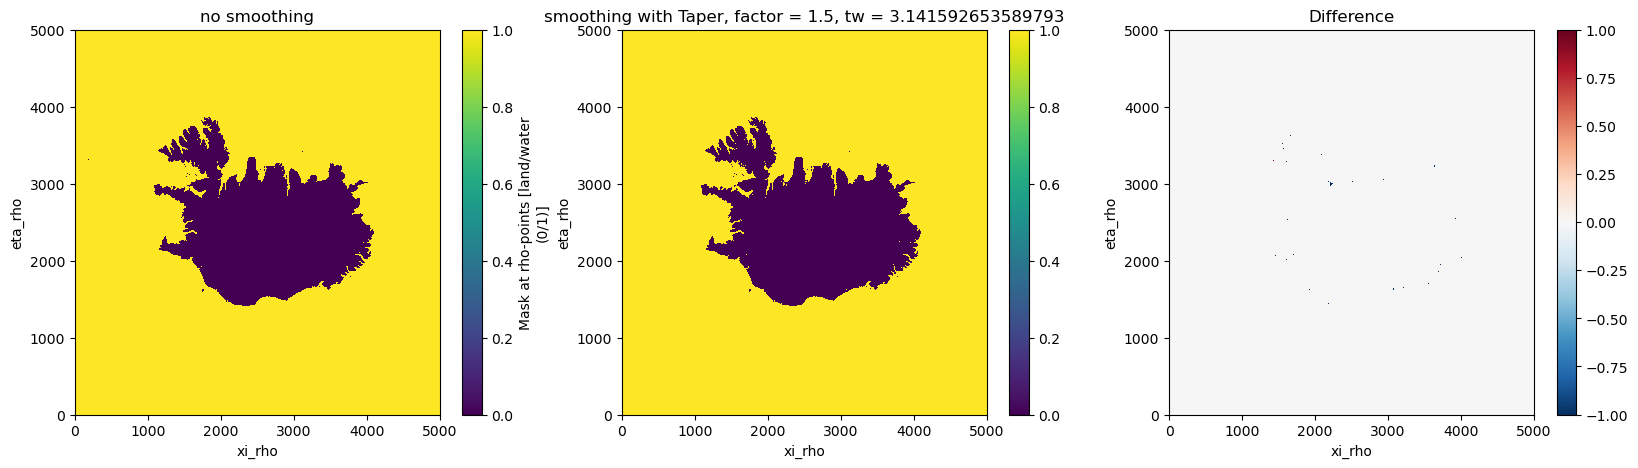

In [88]:
%time use_taper(factor=1.5)

CPU times: user 8.04 s, sys: 1.02 s, total: 9.06 s
Wall time: 9.34 s


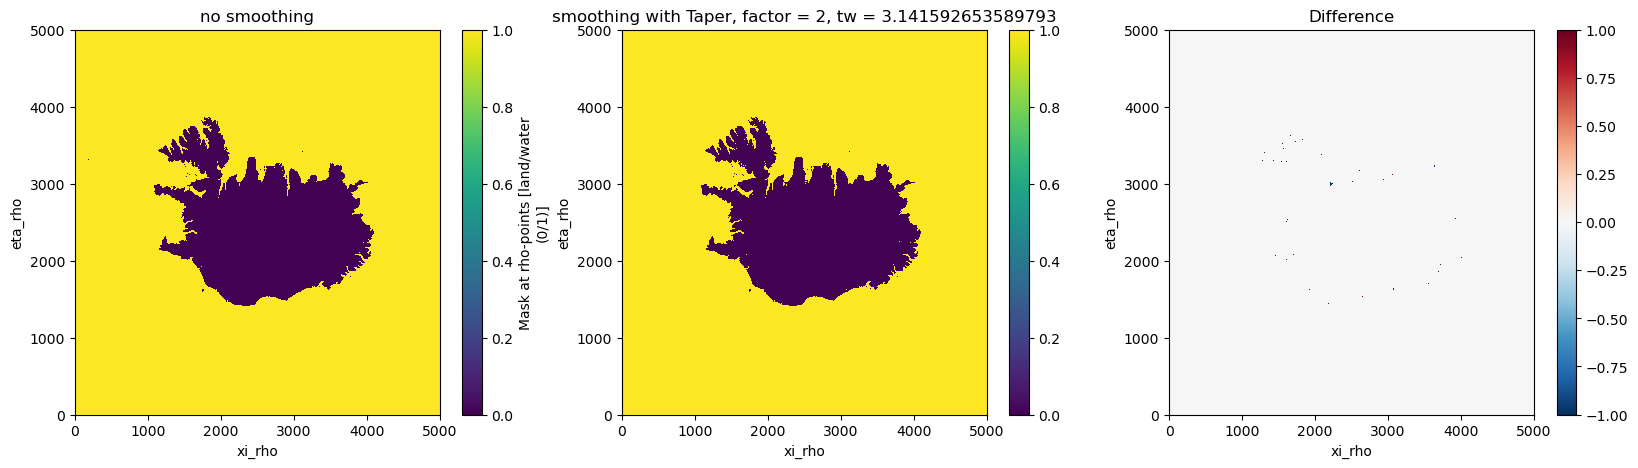

In [89]:
%time use_taper(factor=2)

CPU times: user 7.94 s, sys: 1.65 s, total: 9.59 s
Wall time: 9.78 s


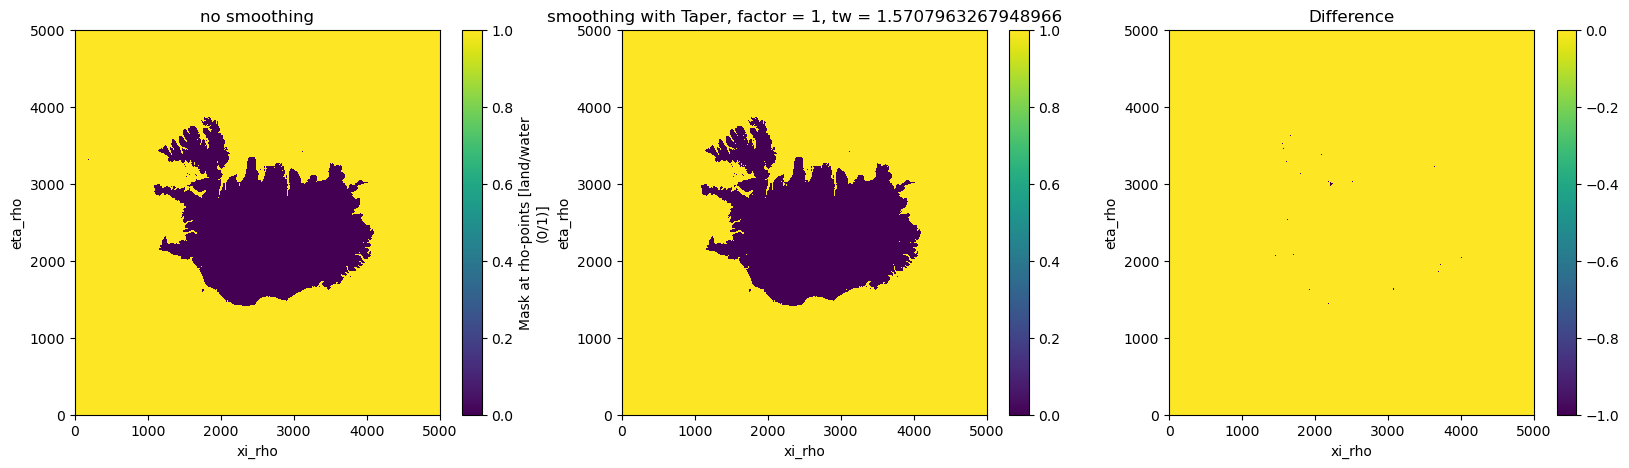

In [90]:
%time use_taper(factor=1, transition_width=np.pi/2)

CPU times: user 7.84 s, sys: 2.36 s, total: 10.2 s
Wall time: 10.4 s


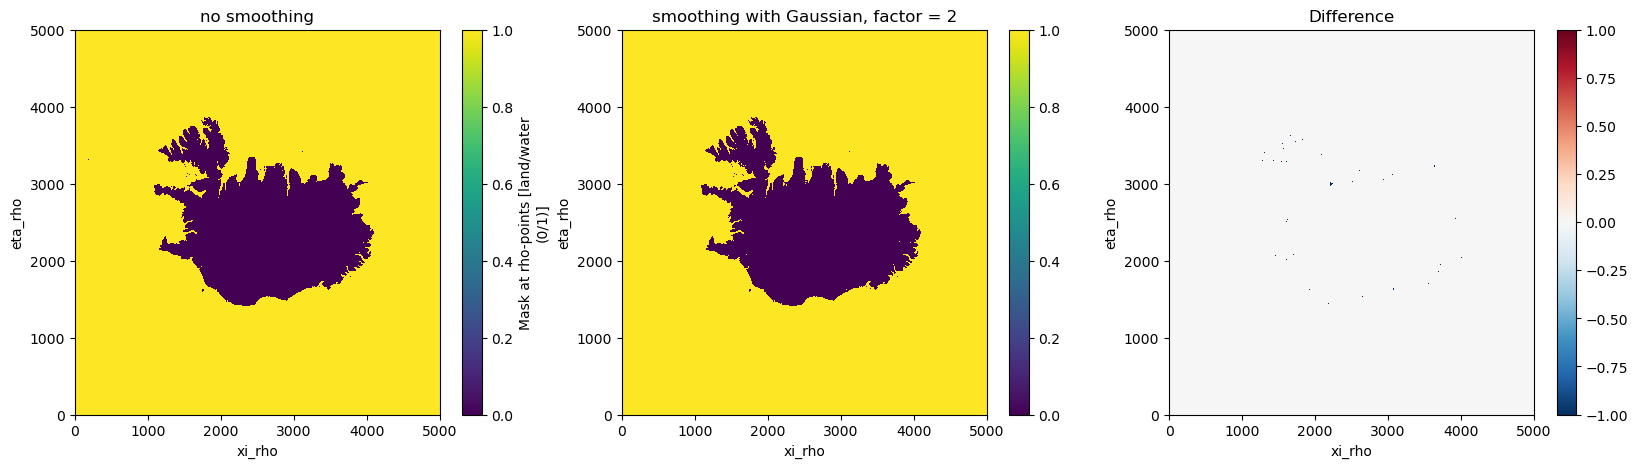

In [94]:
%time use_gaussian(factor=2)

CPU times: user 9.25 s, sys: 3.43 s, total: 12.7 s
Wall time: 12.9 s


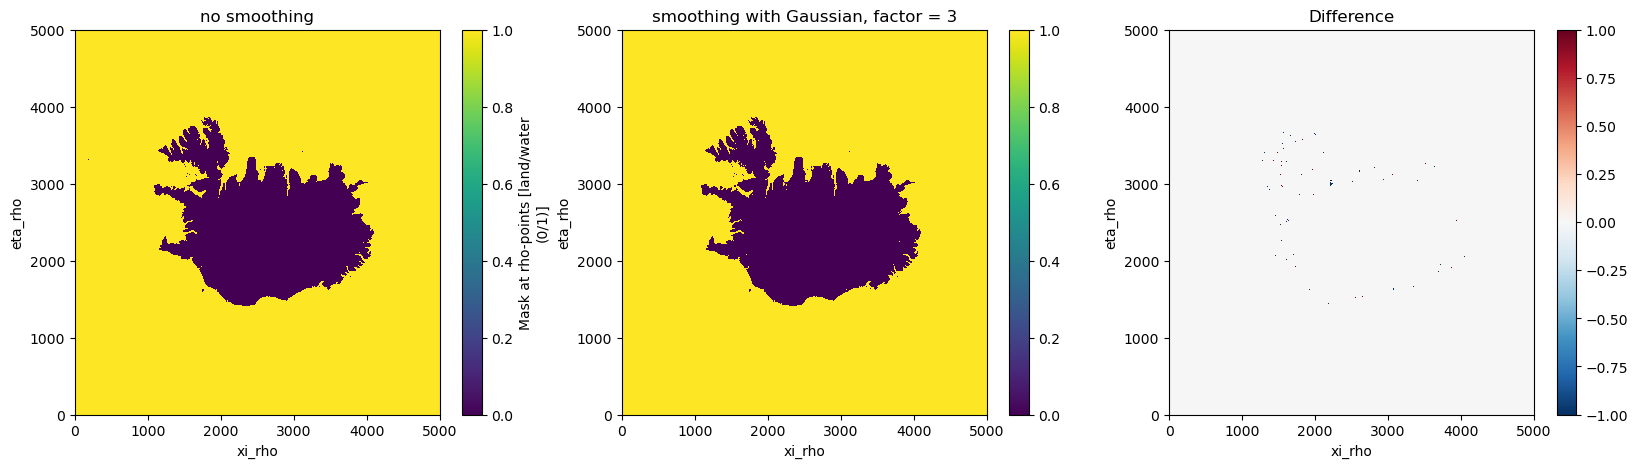

In [95]:
%time use_gaussian(factor=3)

CPU times: user 9.3 s, sys: 3.37 s, total: 12.7 s
Wall time: 13 s


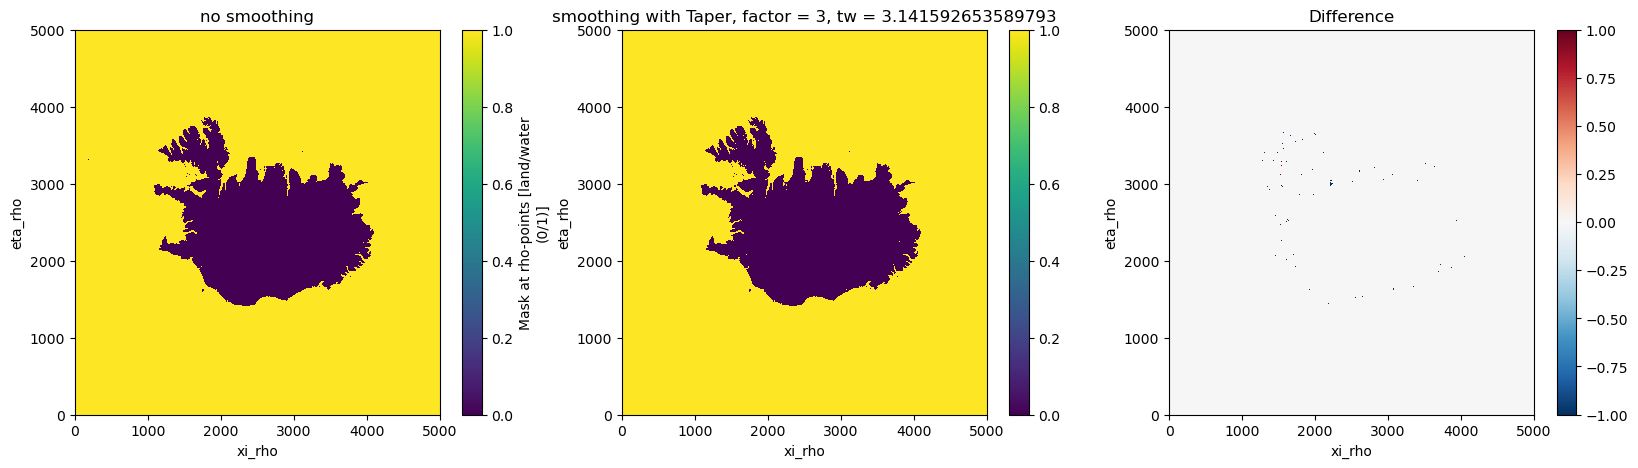

In [96]:
%time use_taper(factor=3)